# Day 2 Lecture

Welcome back!

Let's talk about descriptive statistics:

Measures of Center:
*   Mean
*   Median
*   Mode

Measures of Spread:
*   Standard Deviation
*   IQR
*   Range
*   MAD

Measures of Association:
*   Covariance
*   Correlation





In [1]:
#Import libraries first.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math #Sqrt function
from mpl_toolkits import mplot3d #Is for making plots with color and depth

In [2]:
houseData = pd.read_csv('G:\My Drive\Course Info\Classes\BDA_301_2025_Spring\Data\california_housing_train.csv')

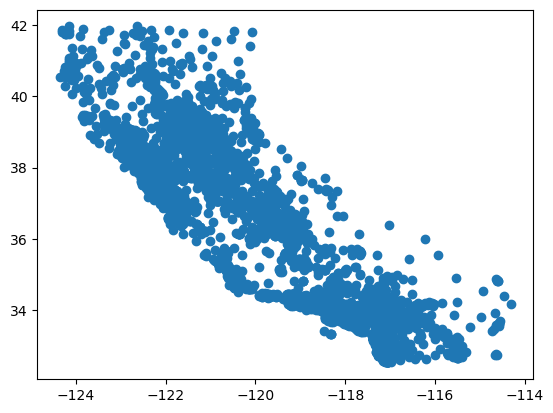

In [3]:
#Always scatter your data. ALWAYS.
caliScatter = plt.scatter(houseData['longitude'],houseData['latitude'])

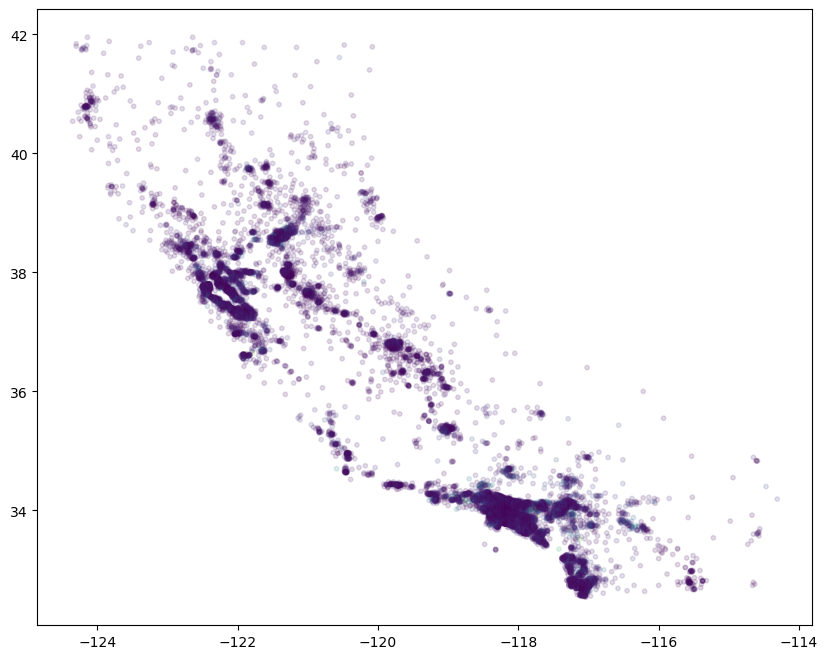

In [13]:
#Let's do even better:
x = houseData['longitude']
y = houseData['latitude']
z = houseData['total_rooms']

#Preplots a figure to take the image, sets size.
plt.figure(figsize=(10, 8))
#spits the image out.
heat = plt.scatter(x,y, s = 10, c = z, alpha = 0.15)

#What do you think these extra parameters did?  s, c, z?  Fiddle around with them till you have a good idea.

Now we've plotted our data, let's start measures of center.

In [5]:
houseData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


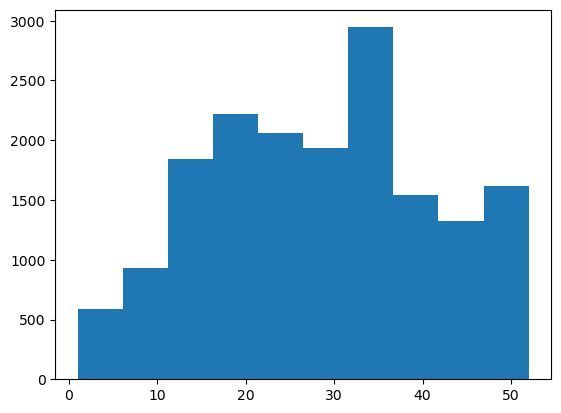

In [6]:
# prompt: Please provide code to load the housing_median_age from the data set houseData and plot a histogram of that data.

housing_median_age = houseData['housing_median_age']

plt.hist(housing_median_age)
plt.show()

In [7]:
barData = houseData.groupby('housing_median_age', as_index=False).size()  #Using as_index = False returns a DF instead of an array object.
barData.head()

,housing_median_age,size
0,1.0,2
1,2.0,49
2,3.0,46
3,4.0,161
4,5.0,199


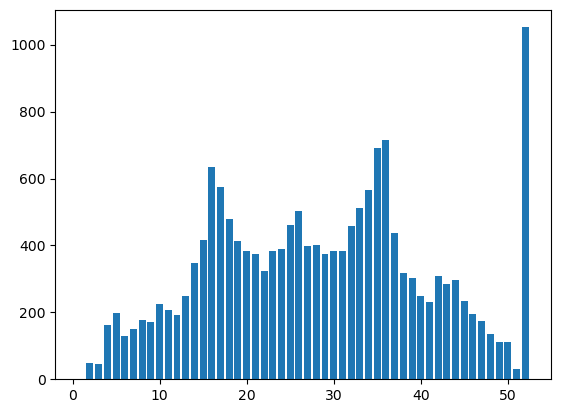

In [8]:
houseHist = plt.bar(barData['housing_median_age'], barData['size'])

Now, looking at this you should be able to take a rough guess of the **mean**, **median** and **mode**.

You do know those definitions ... right?

In [9]:
#Sometimes, you will want multiple bits of information put together and not seperated by ugly lines of code. Consider print in these cases.
#It adds notes to the output, useful if you are going to be grilled on the content.
print("The mean (common average) is:", houseData['housing_median_age'].mean() )
print("The median is:", houseData['housing_median_age'].median() )
print("The mode is:", houseData['housing_median_age'].mode()[0]) #Mode has a funky return: we only want one of the elements, arrays start at 0 in Py.

The mean (common average) is: 28.58935294117647
The median is: 29.0
The mode is: 52.0


In [10]:
houseData[['housing_median_age','longitude']].mean()

housing_median_age     28.589353
longitude            -119.562108
dtype: float64

Wonderful! So we have measures of center! Let's move along and see what else we have.

In [11]:
print("The standard deviation is:", houseData['housing_median_age'].std())
print("The range is:",houseData['housing_median_age'].max() - houseData['housing_median_age'].min())
print("The IQR is:",houseData['housing_median_age'].quantile(0.25) - houseData['housing_median_age'].quantile(0.75))
print("The MAD is:",houseData['housing_median_age'].mad())

The standard deviation is: 12.586936981660335
The range is: 51.0
The IQR is: -19.0


AttributeError: 'Series' object has no attribute 'mad'

Oh no! It didn't work.

Look at the error message. Why didn't it work? Real error is always at the end: ... No attribute 'mad'
Py doesn't know what that command is. 
Maybe a missing package?  I'll show you how to create it.


# Making Functions

You **define** funtions with def statements.
They are advanced. You will not frequently do this, but whenever you CAN do this,  you should do this instead of copypasting. If you don't believe me now, you will later - never copy-paste, never repeat yourself.
I will ask for you to do this 3-4 times throughout the semester.

In [14]:
def mad(data):  #Def means define.  Function will be called "mad", takes 1 paramter called data.
    return np.mean(np.absolute(data - np.mean(data))) #Using the mad command will do this thing and 'return' the output.

In [15]:
print("The MAD is:",mad(houseData['housing_median_age']))

The MAD is: 10.55463185467128


Now, I would not be a teacher if I didn't make sure you know what these functions do. There are endless functions that do *important stuff*. They're all pointless if you don't know how it's done.

It is difficult to seperate out **how X is done** from **what X does** and **what X means**.

In [17]:
def manualMean(dataIn): #Defines the function
  runningSum = 0 #Defines variables in the start
  numberOfObs = len(dataIn) #Define variables at the start
  for i in range(0,numberOfObs): #Your first loop.
    runningSum = runningSum + dataIn[i] #What do you think this does?
  return runningSum/numberOfObs #Returns the total/count aka the average

In [18]:
manualMean(houseData['housing_median_age'])  #Always test your functions. Always test everything.

28.58935294117647

Consider how you would create a function for Standard Deviation.

Formula reference:

*   Mean: $\bar{x} = \Sigma p_i x_i = \frac{1}{N} \Sigma x_i$ in cases where p is constant.
*   Variance: $\sigma^2 = \Sigma (x -\bar{x})^2$
*   Standard Deviation: $\sigma = \sqrt{\Sigma (x -\bar{x})^2}$
*   MAD =  $\frac{1}{N} \Sigma |x_i-\bar{x}|$

Pandas has a great way to simply dump most summary statistics out for usage.

In [19]:
houseData[['longitude','latitude','housing_median_age','population']].describe()

,longitude,latitude,housing_median_age,population
count,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,1429.573941
std,2.005166,2.137340,12.586937,1147.852959
min,-124.350000,32.540000,1.000000,3.000000
25%,-121.790000,33.930000,18.000000,790.000000
50%,-118.490000,34.250000,29.000000,1167.000000
75%,-118.000000,37.720000,37.000000,1721.000000
max,-114.310000,41.950000,52.000000,35682.000000


In class activity:

Consider making a function that calculates standard deviation or MAD:

Here is a broken function that should calculate SD but does not....

```
def manualSD(dataIn): #Defines the function
  runningSum = 0 #Defines variables in the start
  numberOfObs = len(dataIn) #Define variables at the start
  existingAverage = dataIn.mean()
  for i in range(0,numberOfObs): #Your first loop.
    runningSum = dataIn[i] + math.pow(existingAverage, 3) #Add up all the deviations squared...
  return math.sqrt(runningSum/(numberOfObs-1)) #Returns the total/DF
```

Please fix this function below:


In [20]:
def manualSD(dataIn): #Defines the function
  runningSum = 0 #Defines variables in the start
  numberOfObs = len(dataIn) #Define variables at the start
  existingAverage = dataIn.mean() #Mean of dataIn
  for i in range(0,numberOfObs): #Your first loop.
    runningSum = dataIn[i] + math.pow(existingAverage, 3) #What do you think this does?
  return math.sqrt(runningSum/(numberOfObs-1)) #Returns the total/DF

In [21]:
manualSD(houseData['median_income'])

0.06019143114934169

In [22]:
houseData['median_income'].std()

1.908156518379093

In [23]:
#Introduces the == operator for logical equivilancy
print("The functions are essentially the same if this is True:", round(manualSD(houseData['median_income']), 7) == round(houseData['median_income'].std(), 7) )

The functions are essentially the same if this is True: False


In [24]:
houseData.describe() #but it doesn't dump MAD by default.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Now, let's consider the relationships between variables.

We all know the formula for variance is $\Sigma p (x-\bar{x})^2$.
But Covariance?

$\sigma_{x,y} = \Sigma p (x-\bar{x})(y-\bar(y))$

Hint: To memorize this formula, recall the definition of squaring, and memorize variance. We are rotating out one x-based () term for a y-based () term.

In [25]:
houseData.cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,4.020692,-3.965185,-2.883552,2.054900e+02,6.068533e+01,2.340172e+02,4.597465e+01,-0.059248,-1.046125e+04
latitude,-3.965185,4.568221,0.442652,-1.806526e+02,-6.249720e+01,-2.729633e+02,-6.155858e+01,-0.327506,-3.592438e+04
housing_median_age,-2.883552,0.442652,158.430983,-9.904993e+03,-1.700027e+03,-4.275002e+03,-1.465312e+03,-2.784428,1.558535e+05
total_rooms,205.489998,-180.652575,-9904.992690,4.752169e+06,8.530598e+05,2.152369e+06,7.703534e+05,812.729998,3.311968e+07
total_bedrooms,60.685329,-62.497196,-1700.026828,8.530598e+05,1.776618e+05,4.263264e+05,1.589829e+05,-10.853597,2.238200e+06
population,234.017167,-272.963262,-4275.001960,2.152369e+06,4.263264e+05,1.317566e+06,4.013172e+05,-1.396588,-3.707743e+06
households,45.974646,-61.558579,-1465.311997,7.703534e+05,1.589829e+05,4.013172e+05,1.478563e+05,5.608393,2.721855e+06
median_income,-0.059248,-0.327506,-2.784428,8.127300e+02,-1.085360e+01,-1.396588e+00,5.608393e+00,3.641061,1.531215e+05
median_house_value,-10461.246889,-35924.378200,155853.476977,3.311968e+07,2.238200e+06,-3.707743e+06,2.721855e+06,153121.464474,1.345223e+10


Correlation is simply found by $\frac{\sigma_{x,y}}{\sigma_x \sigma_y}$

In [26]:
houseData.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


Why is it always 1 on the diagonal?

There are also several utility packages Zybooks has introduced.

Popular is **seaborn**, a common alternative to **matplotlib**.  

In [27]:
import seaborn as sns #Generally want you to load packages at the start of everything.

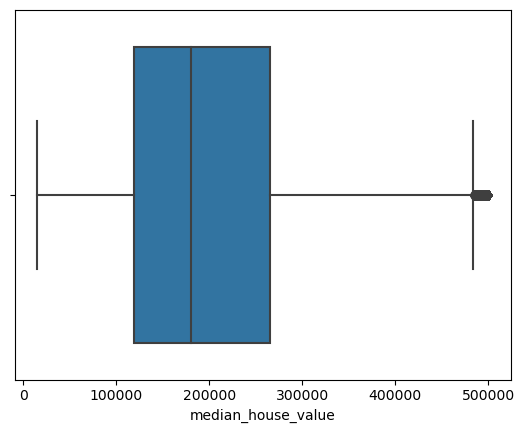

In [28]:
# Works great at making figures
sns.boxplot(x="median_house_value", data=houseData);

But that's not all it can do! First let's break out a portion of the data and "catagorize" it.

In [29]:
houseData['median_income'].quantile(0.75)

4.767

In [30]:
#We are marking what data has income in the top quarter.
houseData['top25pct'] = houseData['median_income'] >= houseData['median_income'].quantile(0.75)

In [31]:
houseData['top25pct'].head(100)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98     True
99     True
Name: top25pct, Length: 100, dtype: bool

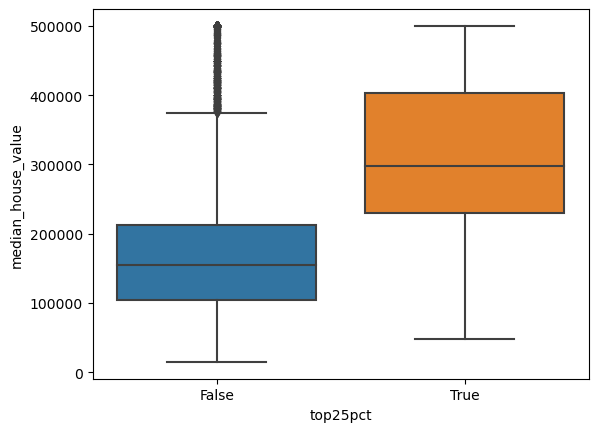

In [32]:
#Boxplot syntax is a bit tricky here.
sns.boxplot(x="top25pct", y="median_house_value", data=houseData);

C:\Users\Bryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


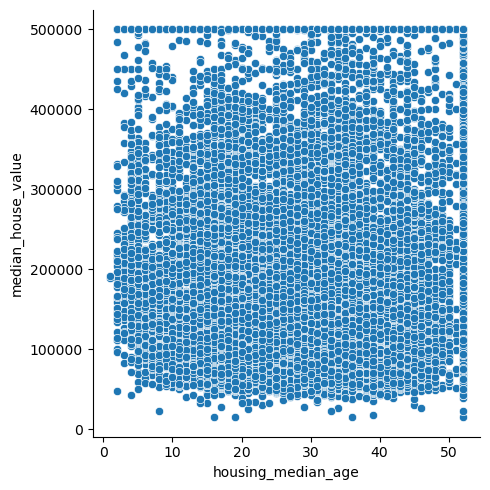

In [33]:
#Here we are looking for a new command that makes 'relational plots', that is to say both variables relate to each other.
scatterByIncome = sns.relplot(data=houseData, x="housing_median_age", y="median_house_value")

C:\Users\Bryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


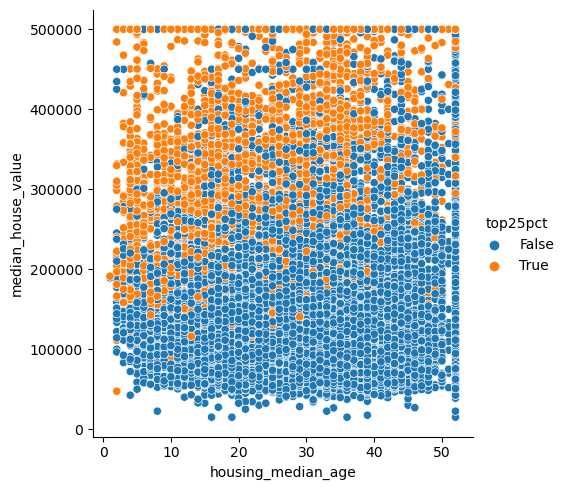

In [34]:
#particularly of interest here is the HUE command. Write what it does afterwards:
scatterByIncome = sns.relplot(data=houseData, x="housing_median_age", y="median_house_value", hue="top25pct")

C:\Users\Bryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


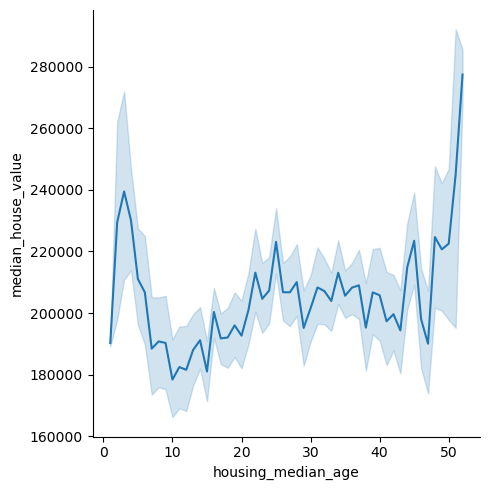

In [35]:
#Relational plots have flexible outputs. Note that the CI's are very slow to calculate, option to turn them off is: errorbar=None
linearFitWithCI = sns.relplot(data=houseData, x="housing_median_age", y="median_house_value", kind="line")

C:\Users\Bryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


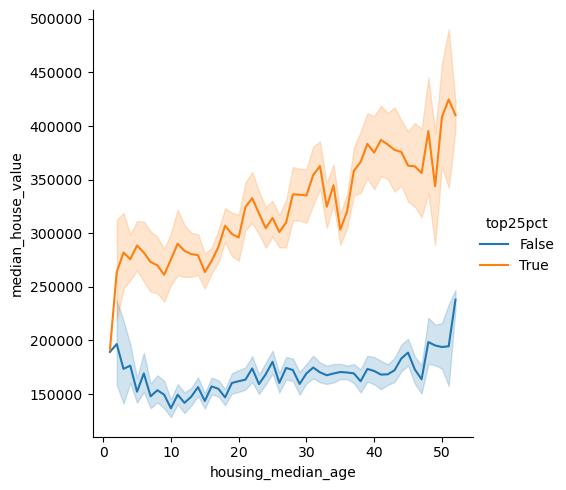

In [36]:
#Seaborn is fairly modular, able to change things quite a bit.
linearFitWithCI = sns.relplot(data=houseData, x="housing_median_age", y="median_house_value", kind="line", hue="top25pct")

C:\Users\Bryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


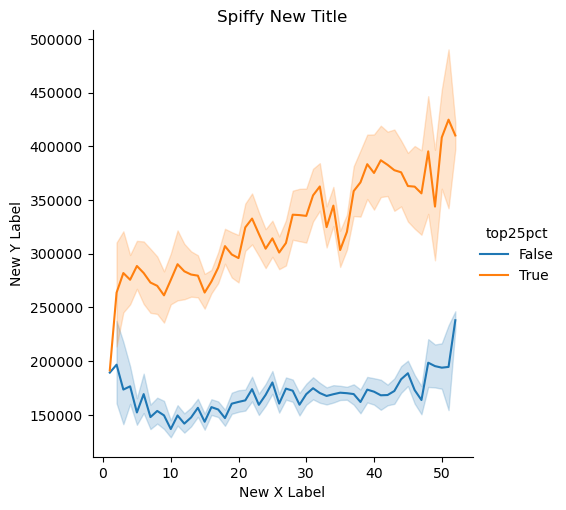

In [37]:
# How do you add labels to these objects?  Seet command works well. However, you have to show the object after modifying it.
linearFitWithCI = sns.relplot(data=houseData, x="housing_median_age", y="median_house_value", kind="line", hue="top25pct")
linearFitWithCI = linearFitWithCI.set(xlabel='New X Label', ylabel='New Y Label', title='Spiffy New Title')  #Important to overwrite object to avoid annoying spam.

End of Class Activity:

First, all students must make COMMENTS on the code I have above. Something that clarifies. These are your personal notes.

*    For a 110, make me function that calculates MAD.  Test it on a data set we have access to.  Note abs() calculates absolute value.
*    For a 100, load me a new data set, and generate 1 summary statistic from that data and 1 figure *that splits along a catagory you have created*.
*    For a 75, examine one of the data sets we currently have in a different way.
*    For a 50, only provide me your notes.

Return this to me by sharing the link in BB.  Make sure to give me FULL ACCESS, so I can run/test/view your code.